# Stroke Prediction

**OBJECTIVE**
- Predict Stroke

**CONTENTS**
 - Importing libraries
 - Importing dataset
 - Exploratory data analysis
 - Categorical Data Distribution
 - Numerical Data Distribution
 - Data preprocessing
 - Models
 - Feature Selection
 - Building Final Model

# Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install inflection

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
pip install mlxtend

In [ ]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA

# feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# Importing dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PRML/StrokePrediction/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.rename(columns={'Residence_type':'residence_type'}, inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

**Data Overview**

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Since there is no duplicate data We will drop "id" column.

In [ ]:
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']
df[column_numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Target Distribution**

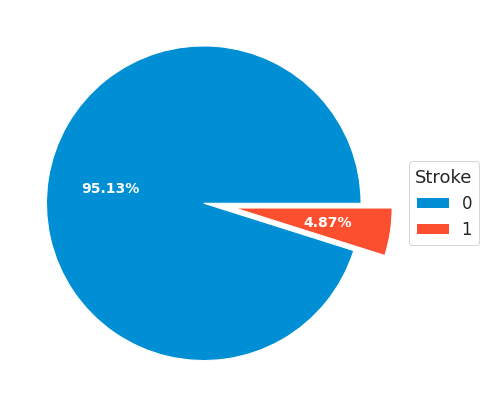

In [ ]:
data = df['stroke'].value_counts(normalize=True).values * 100
label = df['stroke'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(data, startangle = 0, explode = [0, 0.2], autopct = '%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, label, title='Stroke', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# Categorical Data Distribution

**Count Plot**

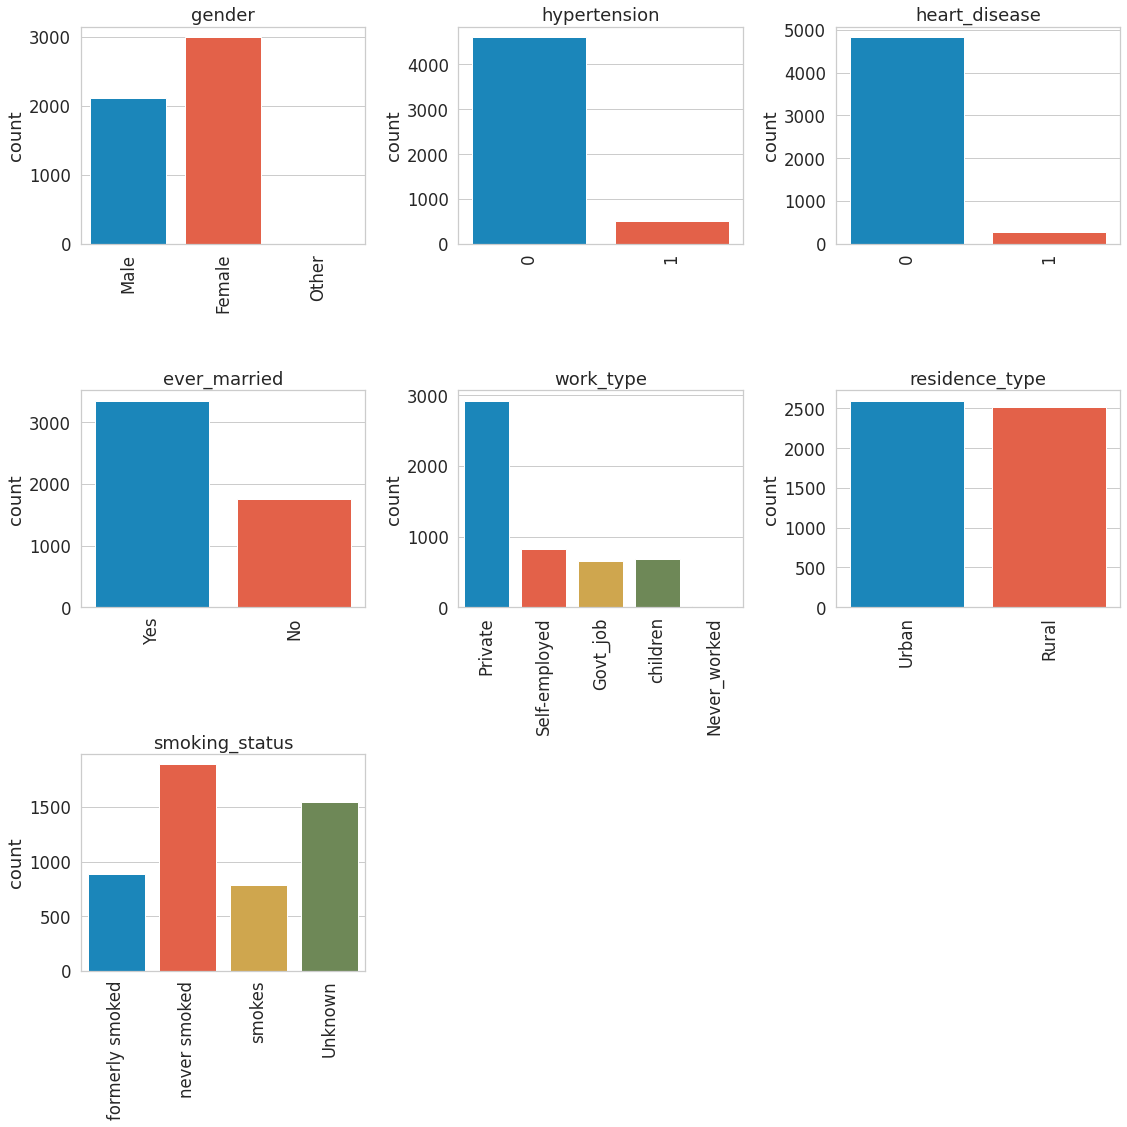

In [ ]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(16,16))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=df, x=col, ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

The `other` category of the `gender` attribute appears only once. We change it with mode of `gender` attribute



In [ ]:
gender_mode = df['gender'].mode().values[0]

df['gender'].replace('Other', gender_mode, inplace=True)
df['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

**Count Plot by Target**

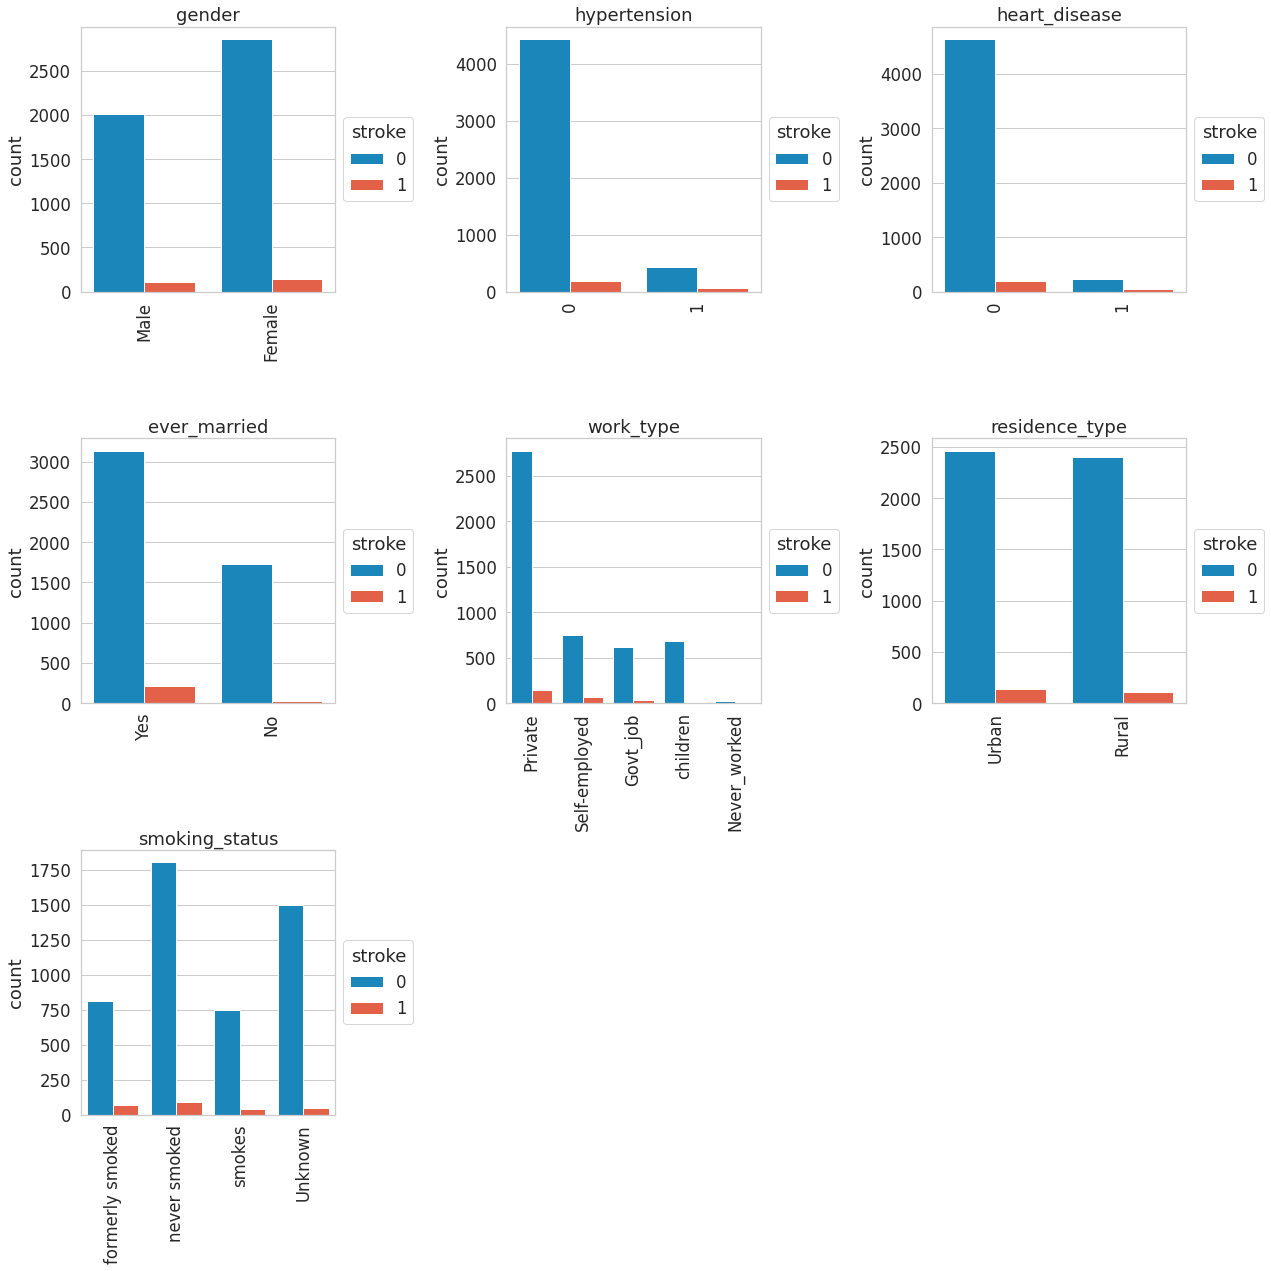

In [ ]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=df, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  
axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

In `smoking_status` attribute, there is an unknown category, which is like null value. We have to change it as it can be confusing for machine learning models.
- We compute the probability of each category of stroke
- Replace the `unknown` category with highest probability of getting stroke or not getting stroke.

In [ ]:
def stacked_bar_plot(data, x, y):
  fig, ax = plt.subplots(figsize=(8,6))

  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')

  crosstab.plot(kind='bar', stacked=True, ax=ax)

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=y) # 1 = x-right, 0.5 = y-center
  ax.set_ylabel('proportion')
  ax.set_yticks(np.linspace(0,1,11))

  for n, x in enumerate(crosstab.index):
    for (proportion, y_loc) in zip(crosstab.loc[x], crosstab.loc[x].cumsum()):
      ax.text(x=n,
              y=(y_loc - proportion) + (proportion / 2),
              s=f'{np.round(proportion * 100, 1)}%',
              color='white',
              fontsize=14,
              fontweight='bold',
              horizontalalignment='center',
              verticalalignment='center')

  plt.show()

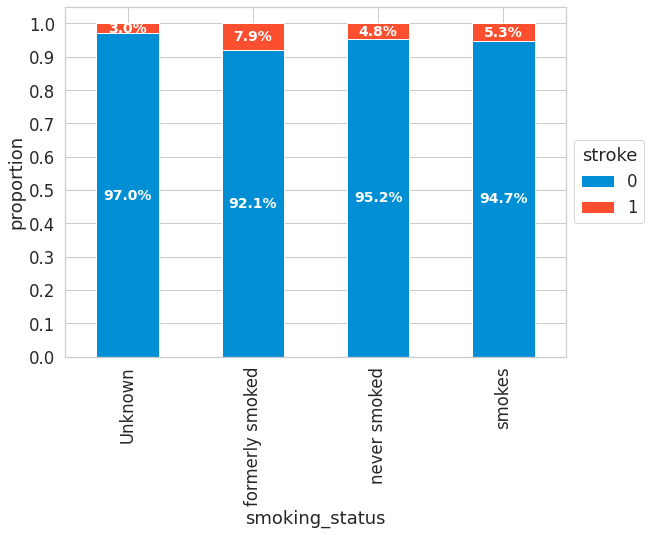

In [ ]:
stacked_bar_plot(df, 'smoking_status', 'stroke')

From this plot, we can see that:
- people who have never smoked are not getting stroke
- people who have formerly smoked are getting stroke

We will replace:
- `unknown` -> `never smoked` for a patient who is not getting stroke
- `unknown` -> `formerly smoked` for a patiend who is getting stroke

**Replacing the Unknown Category**

In [ ]:
df[(df['stroke'] == 1) & (df['smoking_status'] == 'Unknown')].head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1


In [ ]:
mask = (df['stroke'] == 1) & (df['smoking_status'] == 'Unknown')

df.loc[mask, 'smoking_status'] = 'formerly smoked'
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
mask = (df['stroke'] == 0) & (df['smoking_status'] == 'Unknown')

df.loc[mask, 'smoking_status'] = 'never smoked'
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


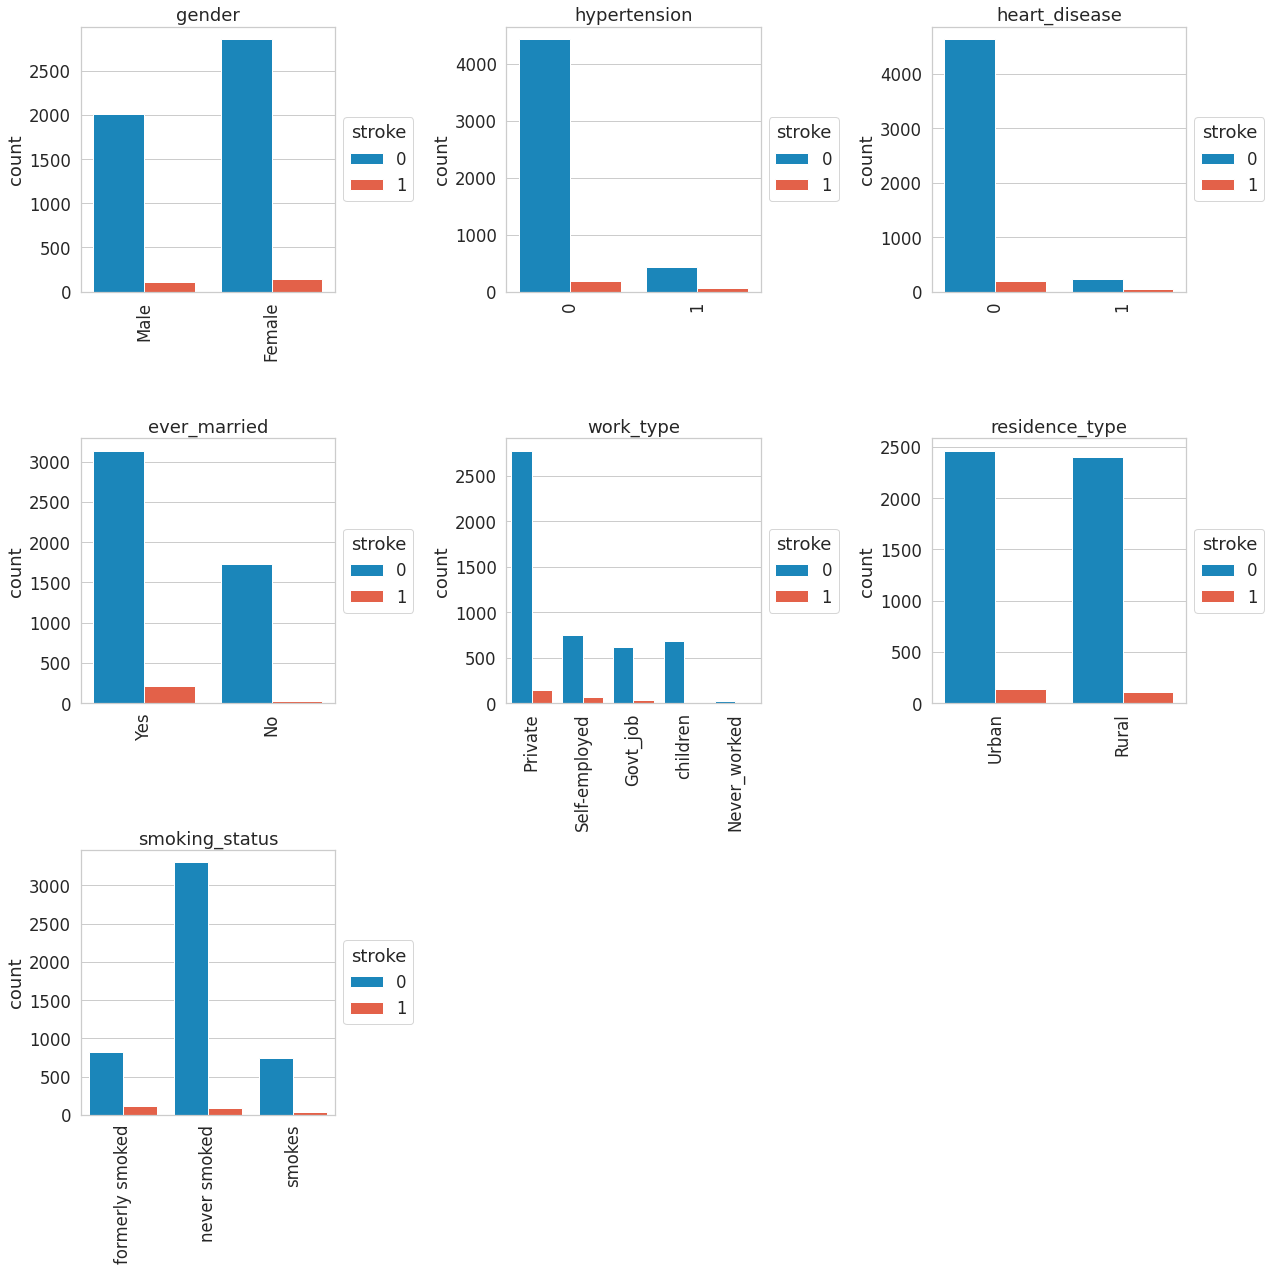

In [ ]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=df, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()


# Numerical Data Distribution

**Box Plot**

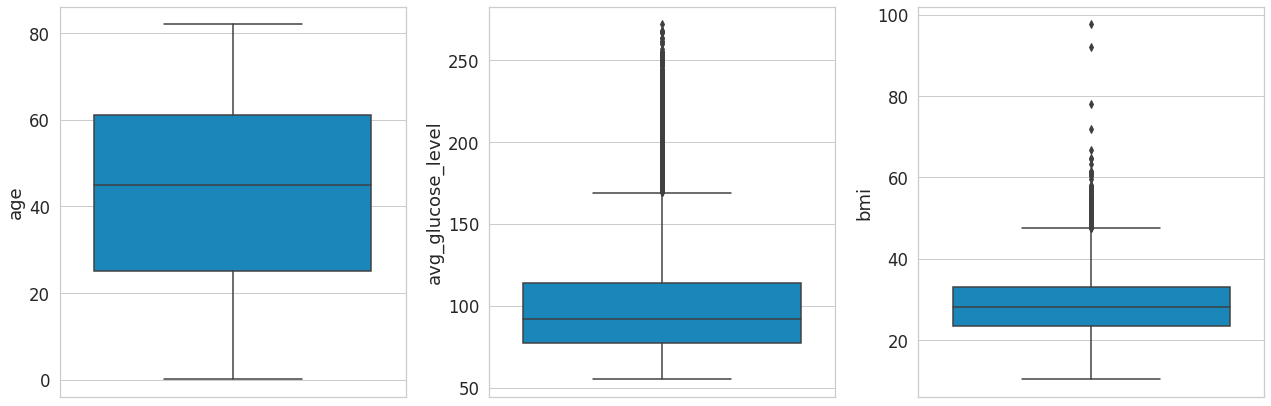

In [ ]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=df, y=col, ax=ax[i])

plt.tight_layout()
plt.show()

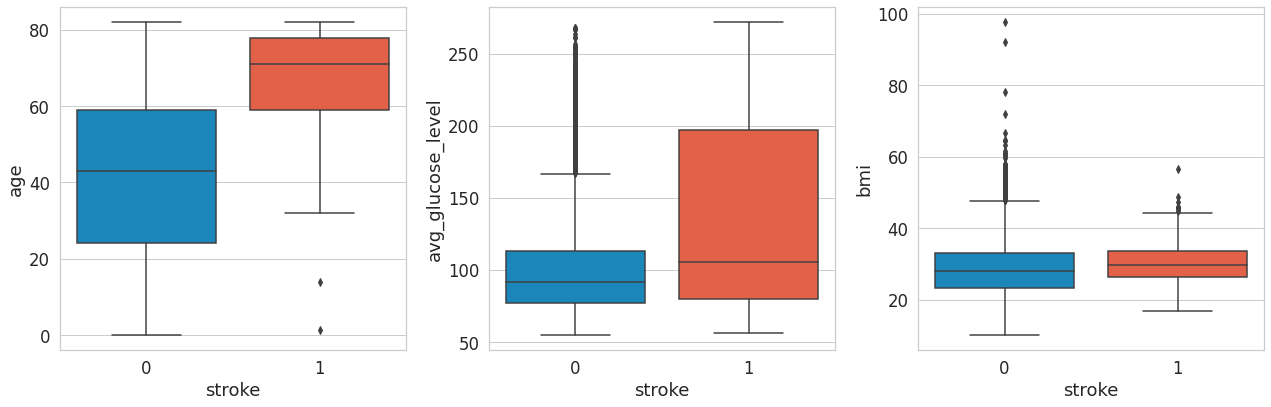

In [ ]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=df, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

**Histogram**

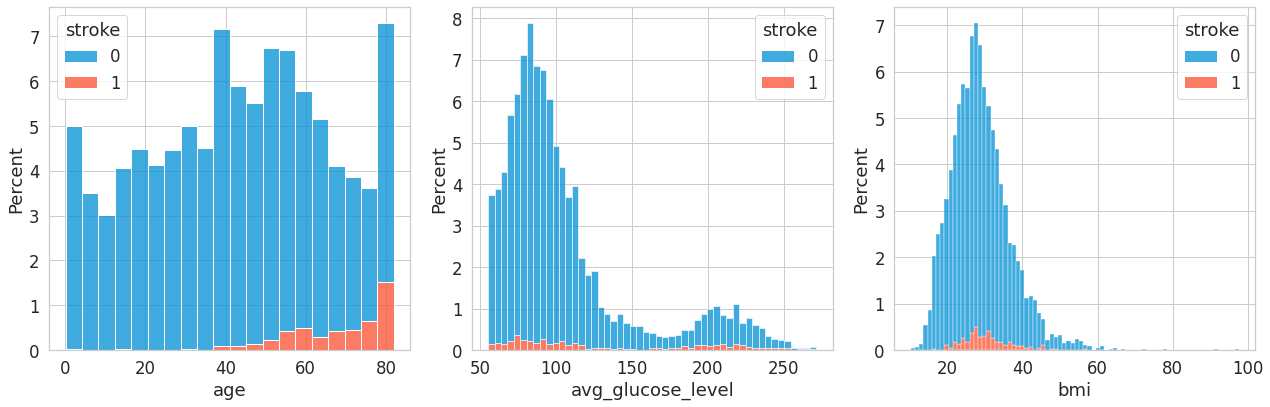

In [ ]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=df, x=col, hue='stroke', multiple='stack', stat='percent', ax=ax[i])

plt.tight_layout()
plt.show()

**Pair Plot**

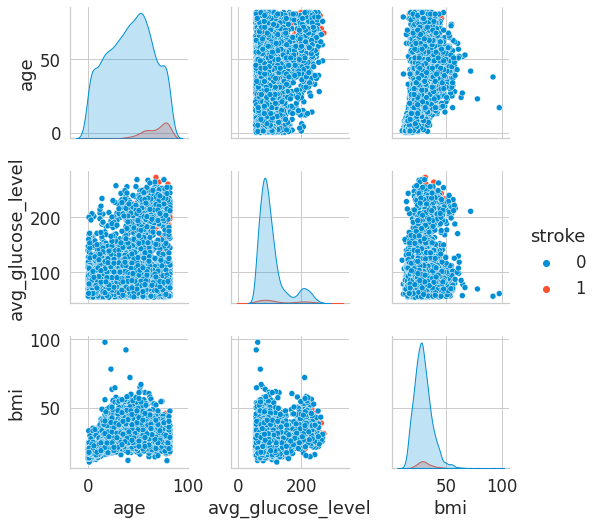

In [ ]:
col = ['age', 'avg_glucose_level', 'bmi']

sns.pairplot(df, x_vars = col, y_vars = col, hue = 'stroke')

**Heatmap Correlation**

In [ ]:
col = ['age', 'avg_glucose_level', 'bmi']

corr_matrix = df[col].corr().round(3)

corr_matrix.style.background_gradient(cmap = 'coolwarm', vmin = -1, vmax = 1)

,age,avg_glucose_level,bmi
age,1.000000,0.238000,0.333000
avg_glucose_level,0.238000,1.000000,0.176000
bmi,0.333000,0.176000,1.000000


# Data Preprocessing

**Data Imputation**

Since `bmi` has many missing values, we will use median to fill these values.

In [ ]:
df['bmi'].fillna(df['bmi'].median(), inplace = True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Feature Encoding**

In [ ]:
lbl = LabelEncoder()
df['gender'] = lbl.fit_transform(df['gender'])
df['ever_married'] = lbl.fit_transform(df['ever_married'])
df['work_type'] = lbl.fit_transform(df['work_type'])
df['residence_type'] = lbl.fit_transform(df['residence_type'])
df['smoking_status'] = lbl.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,0,61.0,0,0,1,3,0,202.21,28.1,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1


**Train - Test Split**

In [ ]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

Here we used `stratify` parameter to make sure the proportion of target variable on train and test set remains balanced

In [ ]:
Y_train.value_counts()

0    3403
1     174
Name: stroke, dtype: int64

In [ ]:
Y_test.value_counts()

0    1458
1      75
Name: stroke, dtype: int64

In [ ]:
print("Percentage of stroke class in Test set = ", (round(75/1458,3))*100, '%')
print("Percentage of stroke class in Train set = ", (round(174/3403,3))*100, '%')

Percentage of stroke class in Test set =  5.1 %
Percentage of stroke class in Train set =  5.1 %


Train and test set have same percentage of `stroke` class which is 5%

**Feature Scaling**

We have used standardization to scale the data

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Heatmap Correlation**

In [ ]:
corr_matrix = df.corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028000,0.021000,0.086000,-0.030000,0.057000,-0.006000,0.055000,-0.026000,-0.022000,0.009000
age,-0.028000,1.000000,0.276000,0.264000,0.679000,-0.362000,0.014000,0.238000,0.324000,-0.125000,0.245000
hypertension,0.021000,0.276000,1.000000,0.108000,0.164000,-0.052000,-0.008000,0.174000,0.158000,-0.018000,0.128000
heart_disease,0.086000,0.264000,0.108000,1.000000,0.115000,-0.028000,0.003000,0.162000,0.037000,-0.024000,0.135000
ever_married,-0.030000,0.679000,0.164000,0.115000,1.000000,-0.353000,0.006000,0.155000,0.335000,-0.052000,0.108000
work_type,0.057000,-0.362000,-0.052000,-0.028000,-0.353000,1.000000,-0.007000,-0.051000,-0.299000,-0.016000,-0.032000
residence_type,-0.006000,0.014000,-0.008000,0.003000,0.006000,-0.007000,1.000000,-0.005000,-0.000000,0.009000,0.015000
avg_glucose_level,0.055000,0.238000,0.174000,0.162000,0.155000,-0.051000,-0.005000,1.000000,0.167000,-0.040000,0.132000
bmi,-0.026000,0.324000,0.158000,0.037000,0.335000,-0.299000,-0.000000,0.167000,1.000000,-0.015000,0.036000
smoking_status,-0.022000,-0.125000,-0.018000,-0.024000,-0.052000,-0.016000,0.009000,-0.040000,-0.015000,1.000000,-0.107000


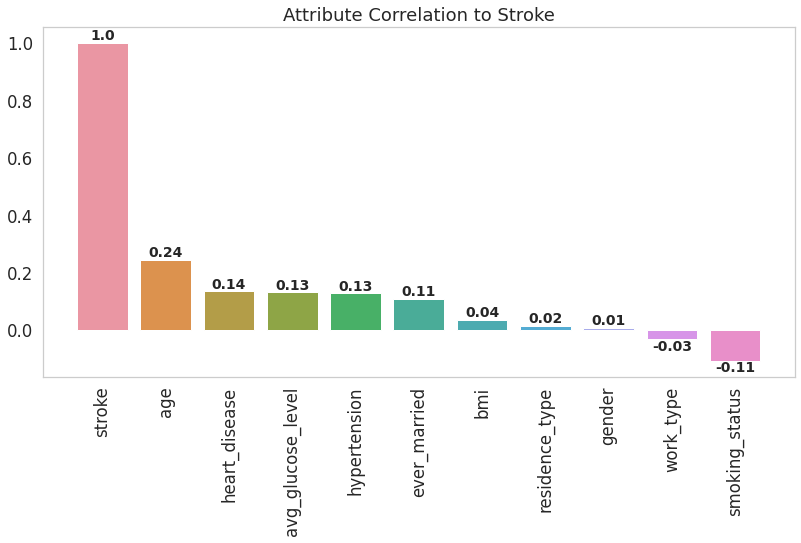

In [ ]:
corr_matrix = df.corr().round(3)
corr_target = corr_matrix['stroke'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation to Stroke')
plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
  if corr_target[n] >= 0:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
  else:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')

plt.show()

# MODELS

**Logistic Regression**

We are storing all the accuracies in a dictionary

In [ ]:
acc_list = dict()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.17      0.01      0.02        75

    accuracy                           0.95      1533
   macro avg       0.56      0.50      0.50      1533
weighted avg       0.91      0.95      0.93      1533



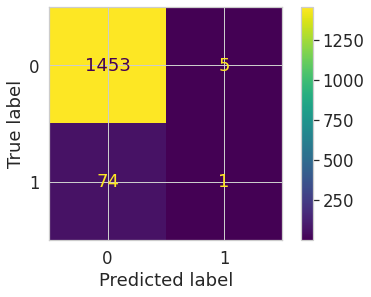

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_preds = log_model.predict(X_test)
acc_list["logistic_regression"] = accuracy_score(Y_test,log_preds)
print(classification_report(Y_test, log_preds))
plot_confusion_matrix(log_model, X_test, Y_test)

**Decision Tree Classifier**

Accuracy Score :  0.913894324853229
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1458
           1       0.19      0.24      0.21        75

    accuracy                           0.91      1533
   macro avg       0.58      0.59      0.58      1533
weighted avg       0.92      0.91      0.92      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


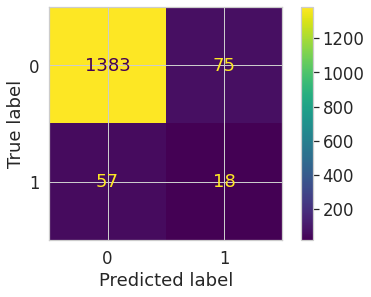

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,Y_train)
y_pred_clf = clf.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred_clf))
print(classification_report(Y_test, y_pred_clf,zero_division=0))
plot_confusion_matrix(clf, X_test, Y_test)

In [ ]:
acc = []
for i in range(2,31):
  clf = DecisionTreeClassifier(max_depth=i, random_state=0)
  clf = clf.fit(X_train,Y_train)
  y_pred_clf = clf.predict(X_test)
  acc.append(accuracy_score(Y_test,y_pred_clf))

In [ ]:
best_max_depth = acc.index(max(acc))+2
print("value of max_depth for best accuracy: ",best_max_depth)

value of max_depth for best accuracy:  2


Accuracy Score :  0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

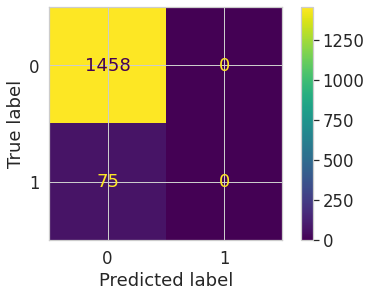

In [ ]:
clf = DecisionTreeClassifier(max_depth = best_max_depth, random_state = 0)
clf.fit(X_train, Y_train)
clf_preds = clf.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,clf_preds))
acc_list["decision_tree"] = accuracy_score(Y_test,clf_preds)
print(classification_report(Y_test, clf_preds))
plot_confusion_matrix(clf, X_test, Y_test)

**Naive Bayes Algorithm**

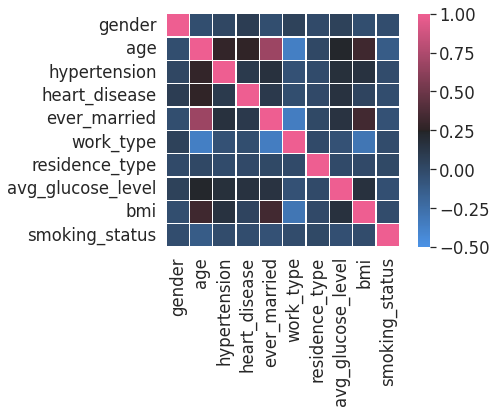

In [ ]:
#Checking the dependency of features on each other
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)   

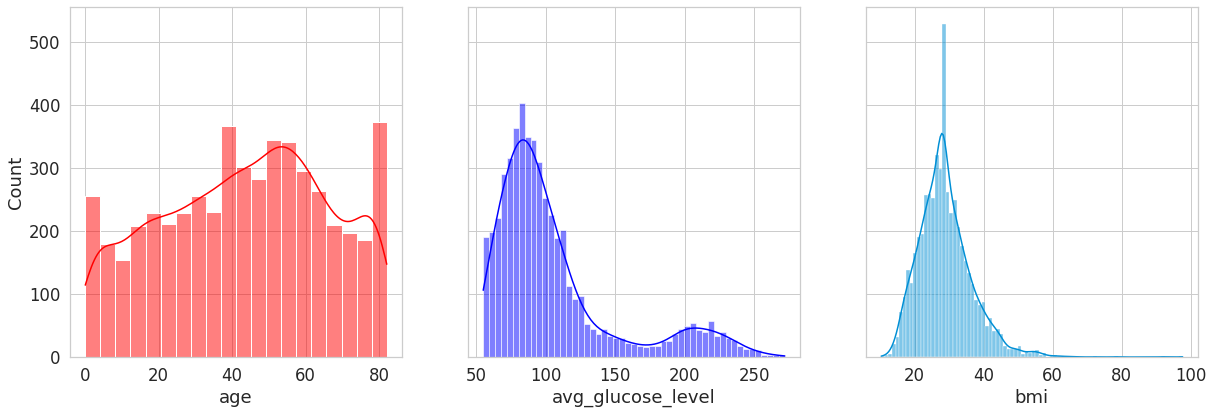

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="age", kde=True, color='r')
sns.histplot(df, ax=axes[1], x="avg_glucose_level", kde=True, color='b')
sns.histplot(df, ax=axes[2], x="bmi", kde=True)

Accuracy Score :  0.8636660143509458
F1 Score :  0.24548736462093865
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      1458
           1       0.17      0.45      0.25        75

    accuracy                           0.86      1533
   macro avg       0.57      0.67      0.59      1533
weighted avg       0.93      0.86      0.89      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


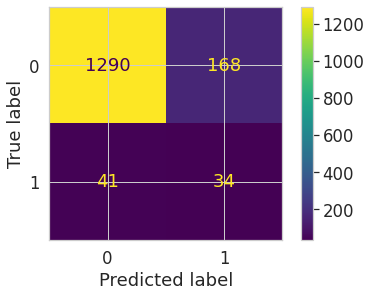

In [ ]:
g = GaussianNB()
g_preds = g.fit(X_train,Y_train).predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,g_preds))
acc_list["gaussian"] = accuracy_score(Y_test,g_preds)
print("F1 Score : ",f1_score(Y_test,g_preds))
print(classification_report(Y_test, g_preds))
plot_confusion_matrix(g, X_test, Y_test)

Accuracy Score :  0.949119373776908
F1 Score :  0.04878048780487805
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.29      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.62      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


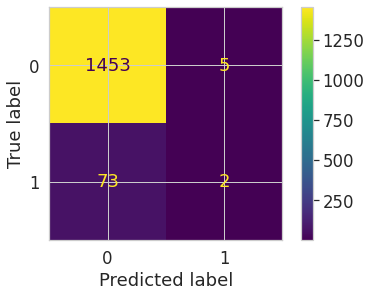

In [ ]:
b = BernoulliNB()
b_preds = b.fit(X_train,Y_train).predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,b_preds))
acc_list["bernoulli"] = accuracy_score(Y_test,b_preds)
print("F1 Score : ",f1_score(Y_test,b_preds))
print(classification_report(Y_test, b_preds))
plot_confusion_matrix(b, X_test, Y_test)

Accuracy Score :  0.7912589693411611
F1 Score :  0.1794871794871795
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1458
           1       0.11      0.47      0.18        75

    accuracy                           0.79      1533
   macro avg       0.54      0.64      0.53      1533
weighted avg       0.93      0.79      0.85      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


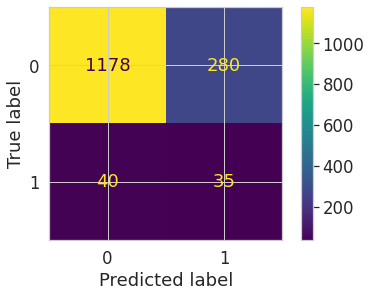

In [ ]:
m = MultinomialNB()
m_preds = m.fit(X_train,Y_train).predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,m_preds))
acc_list["multinomial"] = accuracy_score(Y_test,m_preds)
print("F1 Score : ",f1_score(Y_test,m_preds))
print(classification_report(Y_test, m_preds))
plot_confusion_matrix(m, X_test, Y_test)

**K Nearest Neighbors Classifier**

Accuracy Score :  0.943900848010437
F1 Score :  0.044444444444444446
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.13      0.03      0.04        75

    accuracy                           0.94      1533
   macro avg       0.54      0.51      0.51      1533
weighted avg       0.91      0.94      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


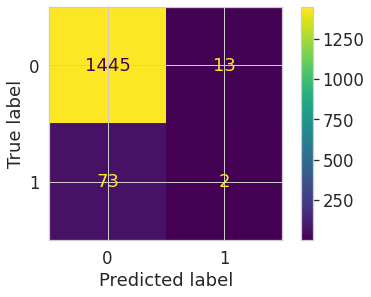

In [ ]:
knn = KNeighborsClassifier()
knn_preds = knn.fit(X_train,Y_train).predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,knn_preds))
acc_list["knn"] = accuracy_score(Y_test,knn_preds)
print("F1 Score : ",f1_score(Y_test,knn_preds))
print(classification_report(Y_test, knn_preds))
plot_confusion_matrix(knn, X_test, Y_test)

**Neural networks**

Accuracy Score :  0.9504240052185258
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.40      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.68      0.51      0.51      1533
weighted avg       0.93      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


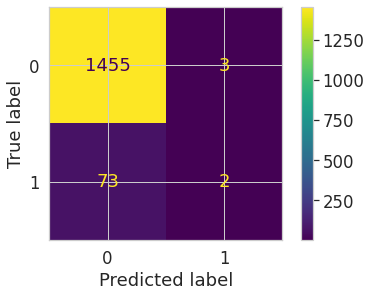

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (50,100,50), random_state=1,activation = "tanh" ,max_iter=500)
mlp_clf = mlp_clf.fit(X_train,Y_train)
y_pred_mlp = mlp_clf.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred_mlp))
acc_list["mlp"] = accuracy_score(Y_test,y_pred_mlp)
print(classification_report(Y_test, y_pred_mlp))
plot_confusion_matrix(mlp_clf, X_test, Y_test)

**Random forest**

Accuracy Score :  0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


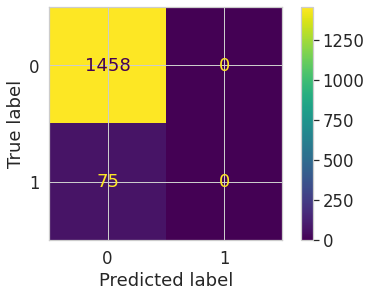

In [ ]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf = clf_rf.fit(X_train,Y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred_rf))
print(classification_report(Y_test, y_pred_rf,zero_division=0))
plot_confusion_matrix(clf_rf, X_test, Y_test)

In [ ]:
acc = []
for i in range(2,31):
  clf_rf = RandomForestClassifier(max_depth=i, random_state=0)
  clf_rf = clf_rf.fit(X_train,Y_train)
  y_pred_rf = clf_rf.predict(X_test)
  acc.append(accuracy_score(Y_test,y_pred_rf))

In [ ]:
best_max_depth = acc.index(max(acc))+2
print("value of max_depth for best accuracy: ",best_max_depth)

value of max_depth for best accuracy:  18


Accuracy Score :  0.9517286366601435
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


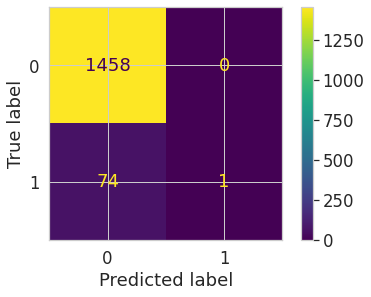

In [ ]:
clf_rf = RandomForestClassifier(max_depth=best_max_depth, random_state=0)
clf_rf = clf_rf.fit(X_train,Y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred_rf))
acc_list["random_forest"] = accuracy_score(Y_test,y_pred_rf)
print(classification_report(Y_test, y_pred_rf,zero_division=0))
plot_confusion_matrix(clf_rf, X_test, Y_test)

**SVM**

Accuracy Score :  0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


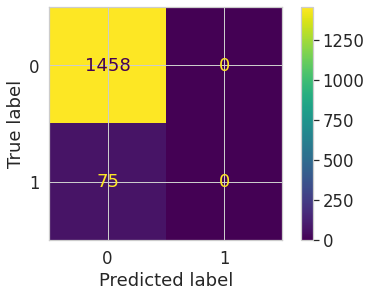

In [ ]:
clf_svc = SVC(kernel="poly",random_state=0,C=10)
clf_svc = clf_svc.fit(X_train,Y_train)
y_pred_svc = clf_svc.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred_svc))
acc_list["SVM"] = accuracy_score(Y_test,y_pred_svc)
print(classification_report(Y_test, y_pred_svc,zero_division=0))
plot_confusion_matrix(clf_svc, X_test, Y_test)

**LDA**

Accuracy Score :  0.9432485322896281
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.25      0.08      0.12        75

    accuracy                           0.94      1533
   macro avg       0.60      0.53      0.55      1533
weighted avg       0.92      0.94      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


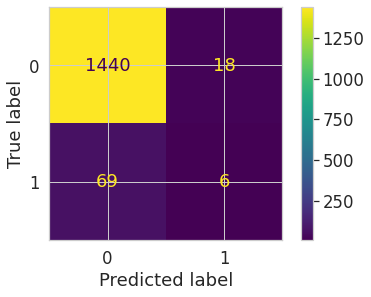

In [ ]:
lda = LDA()
lda = lda.fit(X_train,Y_train)
y_pred_lda = lda.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred_lda))
acc_list["LDA"] = accuracy_score(Y_test,y_pred_lda)
print(classification_report(Y_test, y_pred_lda,zero_division=0))
plot_confusion_matrix(lda, X_test, Y_test)

**QDA**

Accuracy Score :  0.878016960208741
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1458
           1       0.18      0.41      0.25        75

    accuracy                           0.88      1533
   macro avg       0.57      0.66      0.59      1533
weighted avg       0.93      0.88      0.90      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


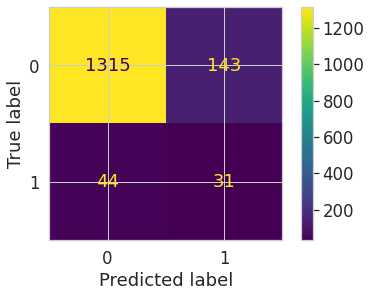

In [ ]:
qda = QDA()
qda = qda.fit(X_train,Y_train)
y_pred_qda = qda.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred_qda))
acc_list["QDA"] = accuracy_score(Y_test,y_pred_qda)
print(classification_report(Y_test, y_pred_qda,zero_division=0))
plot_confusion_matrix(qda, X_test, Y_test)

In [ ]:
print(acc_list.keys())

dict_keys(['logistic_regression', 'decision_tree', 'gaussian', 'bernoulli', 'multinomial', 'knn', 'mlp', 'random_forest', 'SVM', 'LDA', 'QDA'])


In [ ]:
data = pd.DataFrame({"MODELS" : acc_list.keys() , "ACCURACY" : acc_list.values()})
data

,MODELS,ACCURACY
0,logistic_regression,0.948467
1,decision_tree,0.951076
2,gaussian,0.863666
3,bernoulli,0.949119
4,multinomial,0.791259
5,knn,0.943901
6,mlp,0.950424
7,random_forest,0.951729
8,SVM,0.951076
9,LDA,0.943249


# Feature Selection

In [ ]:
# Sequential Forward Selection
sfs1 = SFS(log_model, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4)
sfs1 = sfs1.fit(X_train, Y_train)

print('\nSequential Forward Selection (k=4):')
print('CV Score:')
print(sfs1.k_score_)


Sequential Forward Selection (k=4):
CV Score:
0.9513560296451827


In [ ]:
# Sequential Forward Floating Selection
sffs = SFS(log_model, 
           k_features=4, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4)
sffs = sffs.fit(np.array(X_train), Y_train)

print('\nSequential Forward Floating Selection (k=4):')
print(sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)


Sequential Forward Floating Selection (k=4):
('0', '1', '2', '3')
CV Score:
0.9513560296451827


# Building Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.17      0.01      0.02        75

    accuracy                           0.95      1533
   macro avg       0.56      0.50      0.50      1533
weighted avg       0.91      0.95      0.93      1533



In [ ]:
print('Accuracy\t: ', round(accuracy_score(Y_test, y_pred),3))
print('Precision\t: ', round(precision_score(Y_test, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(Y_test, y_pred, average='macro'),3))

Accuracy	:  0.948
Precision	:  0.559
Recall		:  0.505


In [ ]:
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Stroke', 1:'Stroke'}, index={0:'Not Stroke', 1:'Stroke'}, inplace=True)
df_cm

,Not Stroke,Stroke
Not Stroke,1453,5
Stroke,74,1


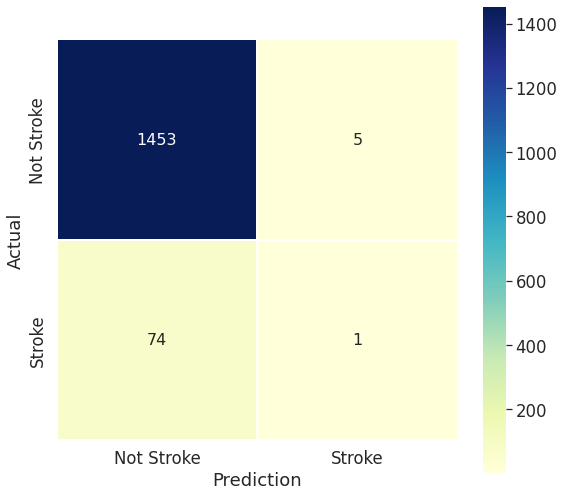

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()